### Health Insurance Premium Prediction with Machine Learning

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 10000)

In [7]:
data  = pd.read_csv('Health_insurance.csv')

In [9]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
data.shape

(1338, 7)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [17]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [19]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [21]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [31]:
data.duplicated().sum()

1

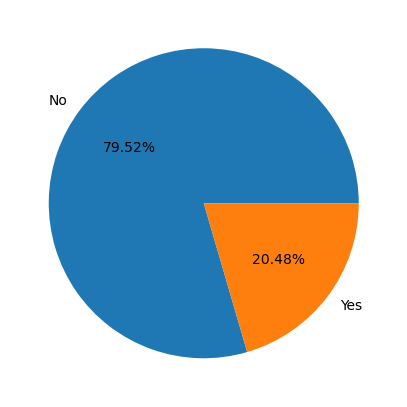

In [65]:
plt.figure(figsize=(5, 20))
plt.pie(x = data.smoker.value_counts(), labels = ['No', 'Yes'], autopct = '%.2f%%')
plt.show()

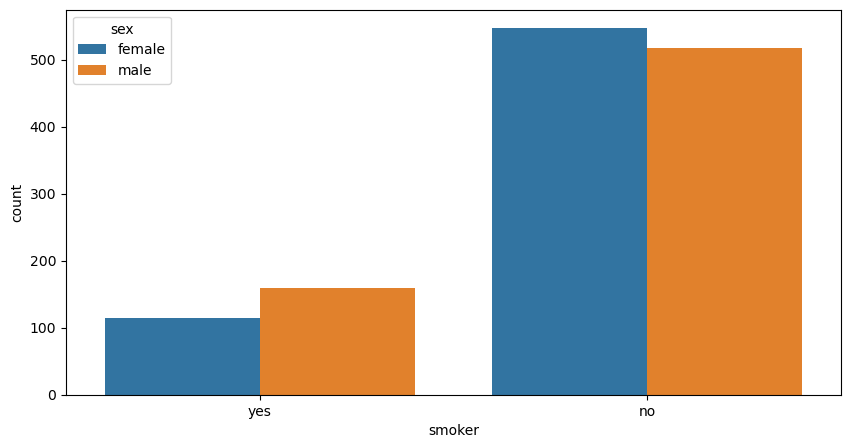

In [67]:
plt.figure(figsize=(10, 5))
sns.countplot(data = data, x = 'smoker', hue = 'sex')

plt.show()

In [69]:
data["sex"] = data["sex"].map({"female": 0, "male": 1})
data["smoker"] = data["smoker"].map({"no": 0, "yes": 1})

In [71]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


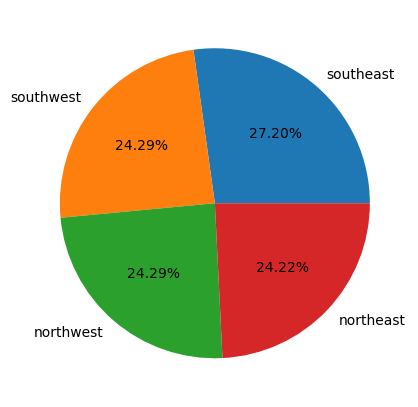

In [75]:
plt.figure(figsize=(5, 20))
plt.pie(x = data.region.value_counts(), labels = ['southeast', 'southwest', 'northwest', 'northeast'], autopct = '%.2f%%')
plt.show()

<Axes: >

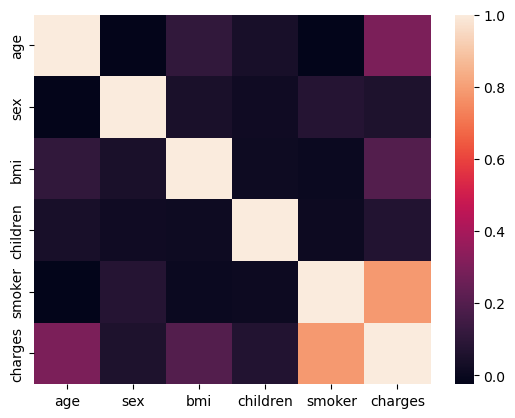

In [84]:
sns.heatmap(data.corr(numeric_only = True))

In [86]:
X = data[["age", "sex", "bmi", "smoker"]]

In [90]:
y = data[["charges"]]

In [95]:
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [99]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 4), (268, 4), (1070, 1), (268, 1))

In [101]:
from sklearn.ensemble import RandomForestRegressor

In [103]:
rf = RandomForestRegressor()

In [105]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [107]:
y_pred = rf.predict(X_test)

In [123]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [121]:
r2_score(y_test, y_pred)

0.8467824882977114

In [125]:
mean_squared_error(y_test, y_pred)

23786824.334106266

In [127]:
mean_absolute_error(y_test, y_pred)

2670.909416603924